In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


In [13]:
data_raw = pd.read_csv('../data/raw_data/data.csv')

In [14]:
data_raw

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...,...
31639,31639,Thompson,NaN,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3
31640,31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9
31641,31641,Thompson,NaN,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3
31642,31642,Thompson,tube,6.89,3825.0,NaN,23.6,23.6,1972.0,3.7


In [15]:
# Investigamos los valores únicos
desc = pd.DataFrame(index = list(data_raw))
desc['count'] = data_raw.count()
desc['nunique'] = data_raw.nunique()
desc['%unique'] = desc['nunique'] / len(data_raw) * 100
desc['null'] = data_raw.isnull().sum()
desc['type'] = data_raw.dtypes
desc


,count,nunique,%unique,null,type
id,31644,31644,100.000000,0,int64
author,26620,10,0.031602,5024,object
geometry,26144,3,0.009480,5500,object
pressure [MPa],27192,144,0.455063,4452,float64
mass_flux [kg/m2-s],26853,733,2.316395,4791,float64
x_e_out [-],21229,1682,5.315384,10415,float64
D_e [mm],26156,43,0.135887,5488,float64
D_h [mm],27055,49,0.154848,4589,float64
length [mm],26885,70,0.221211,4759,float64
chf_exp [MW/m2],31644,109,0.344457,0,float64


In [16]:
# Las variables con pocos únicos, a pesar de ser numéricas, las podemos considerar categóricas.
# Estas variables son D_e [mm], D_h [mm], length [mm].
categorical_features = data_raw.columns[:3]
numerical_features = data_raw.copy().drop(columns = categorical_features).columns


In [17]:
categorical_features

Index(['id', 'author', 'geometry'], dtype='object')

In [18]:
data_raw

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...,...
31639,31639,Thompson,NaN,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3
31640,31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9
31641,31641,Thompson,NaN,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3
31642,31642,Thompson,tube,6.89,3825.0,NaN,23.6,23.6,1972.0,3.7


# Estudiamos la distribución de las variables numéricas

In [19]:
# Estudiamos la distribución de las variables numéricas
data_raw[numerical_features].describe()


,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
count,27192.000000,26853.000000,21229.000000,26156.000000,27055.000000,26885.000000,31644.000000
mean,10.640747,3068.011023,-0.000453,8.629255,14.174330,832.987391,3.796985
std,4.333683,1777.032080,0.100911,5.185692,19.838489,672.299239,1.983991
min,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000
25%,6.890000,1519.000000,-0.046600,5.000000,5.600000,318.000000,2.400000
50%,11.070000,2731.000000,0.003800,7.800000,10.000000,610.000000,3.400000
75%,13.790000,4069.000000,0.064800,10.800000,11.500000,914.000000,4.600000
max,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000


IndexError: index 7 is out of bounds for axis 0 with size 7

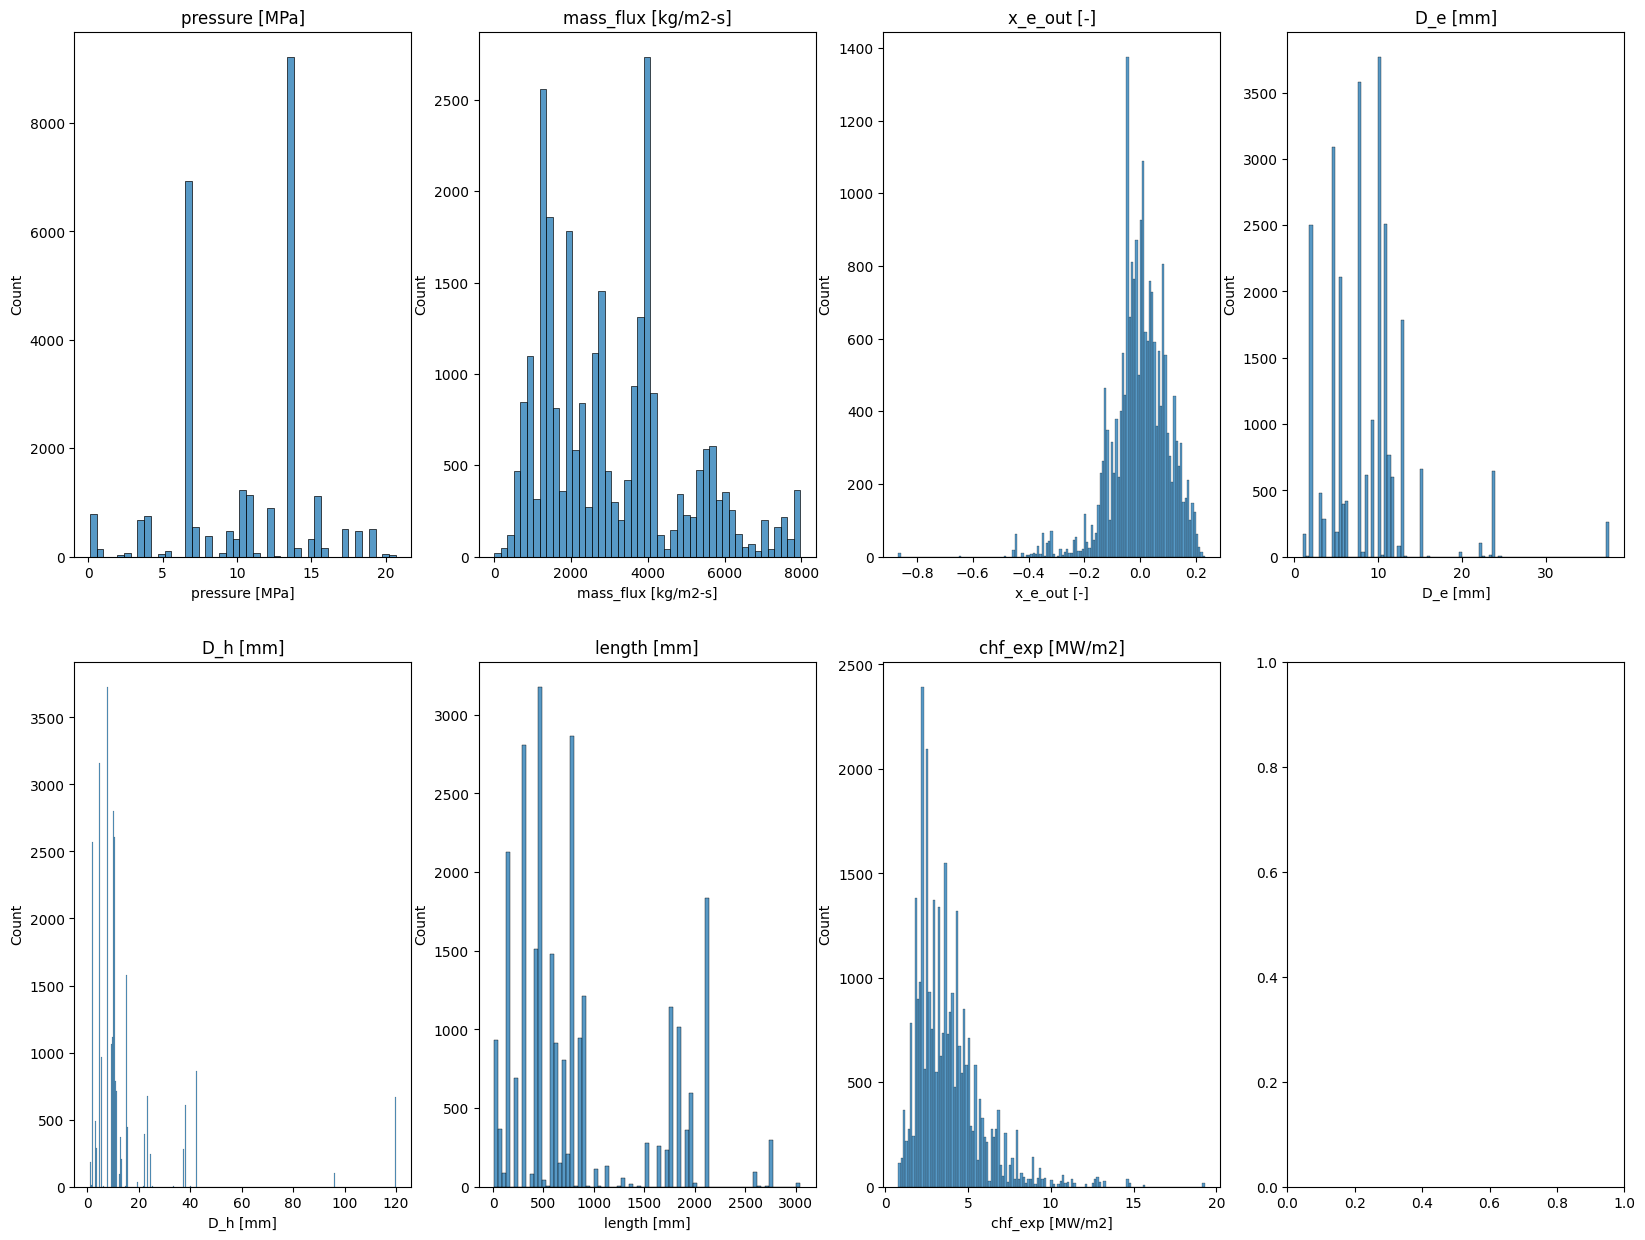

In [20]:
# Lo representamos gráficamente
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
for i, ax in enumerate(axes.flatten()):
    sns.histplot(data_raw[numerical_features[i]], ax=ax)
    ax.set_title(numerical_features[i])
plt.tight_layout()
plt.show()


# Comprobamos outliers


IndexError: index 7 is out of bounds for axis 0 with size 7

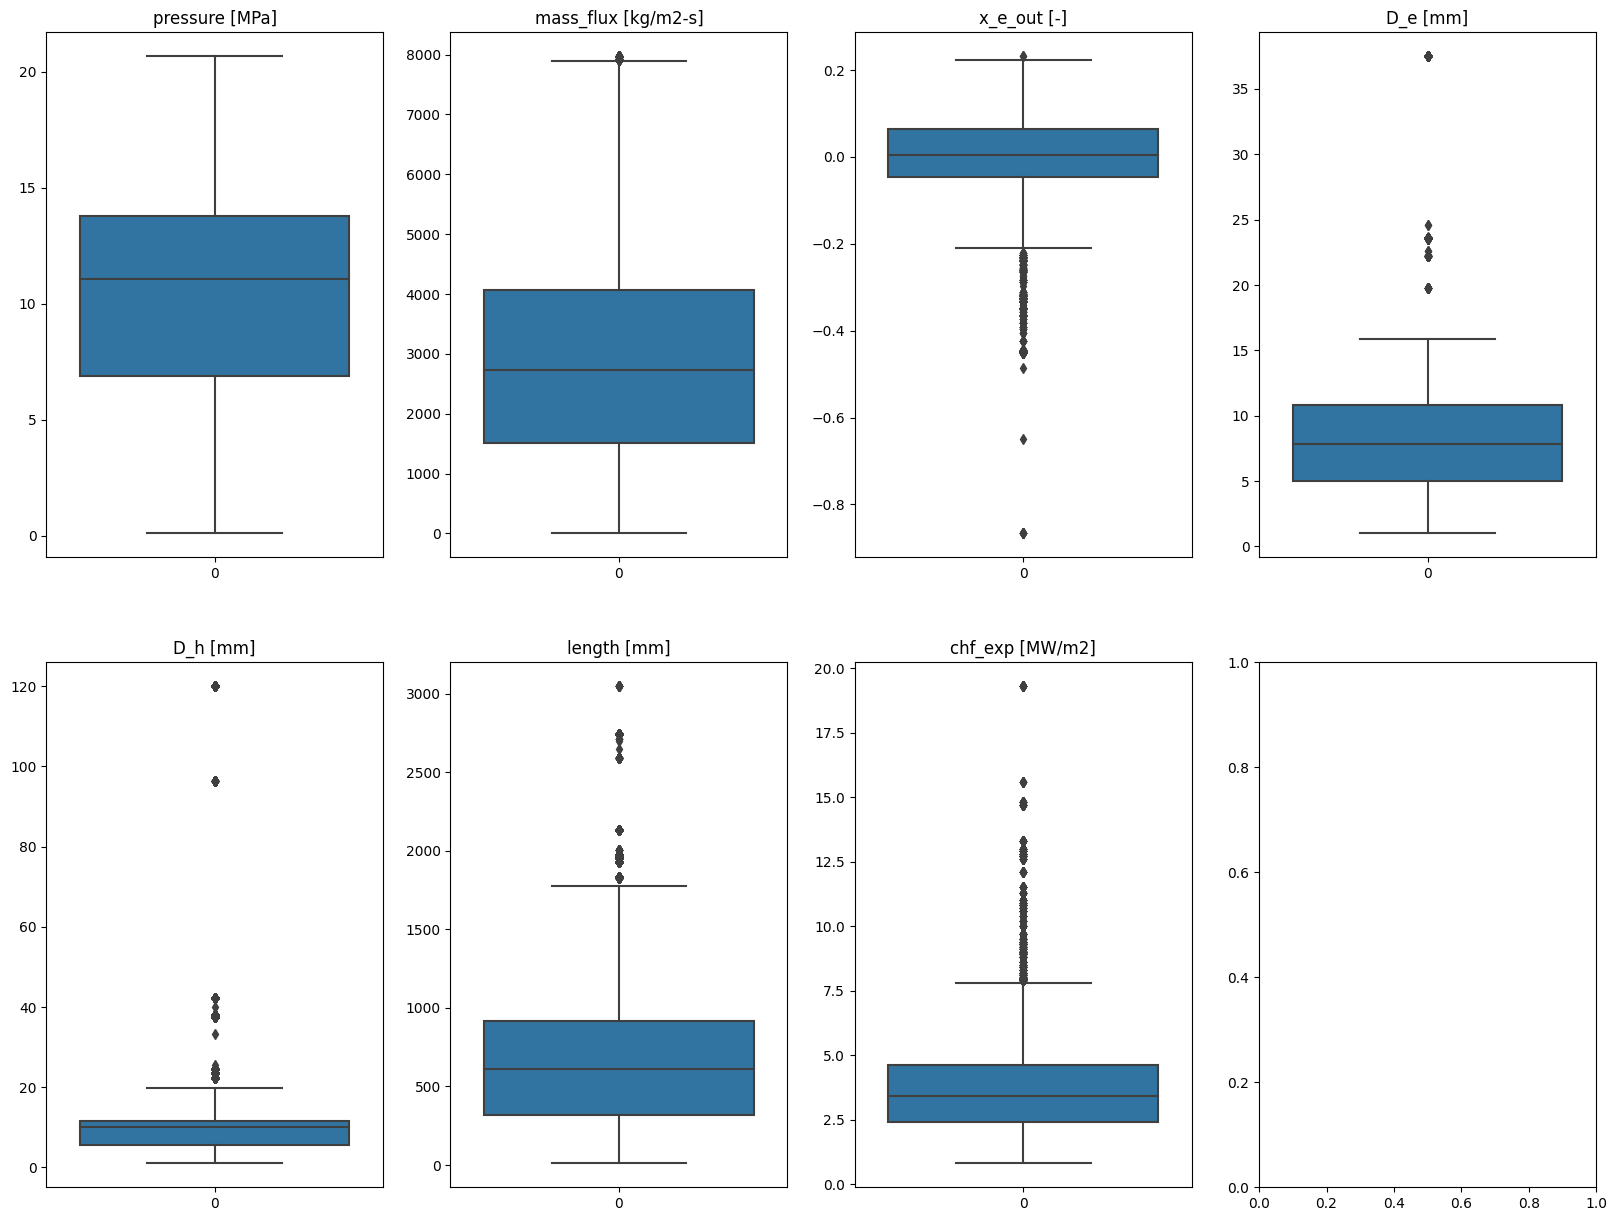

In [21]:
# Comprobamos los outliers de data_raw
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(data_raw[numerical_features[i]], ax=ax)
    ax.set_title(numerical_features[i])
plt.tight_layout()
plt.show()


# Análisis de las variables categóricas
## Vemos que ambas están desbalanceadas

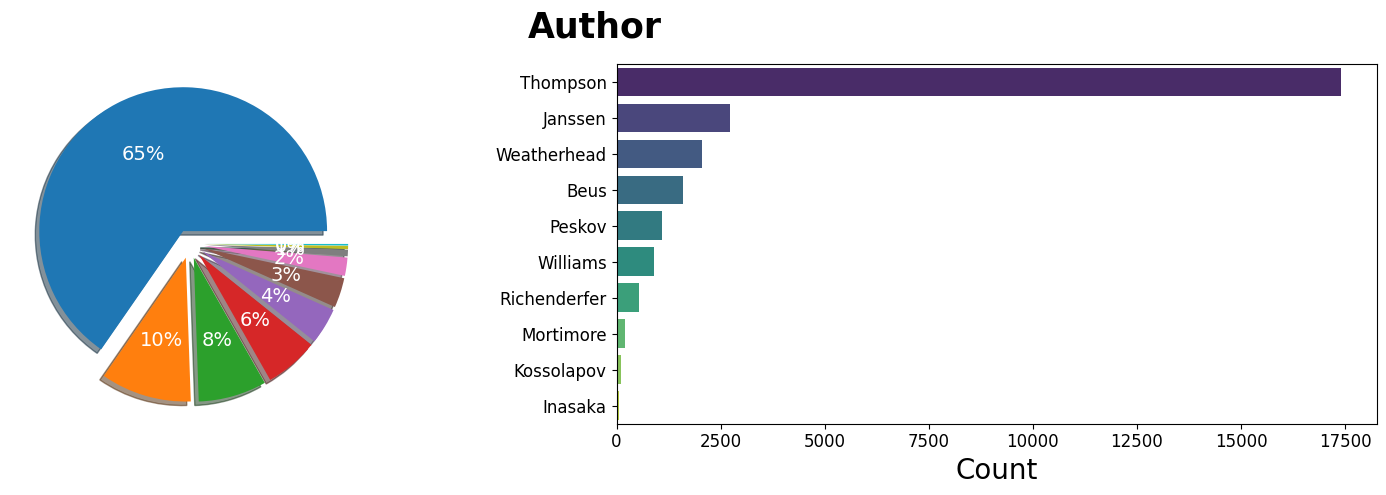

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax = ax.flatten()

ax[0].pie(
    data_raw['author'].value_counts(), 
    shadow = True, 
    explode = [.1 for i in range(0, 10)], 
    autopct = '%1.f%%',
    textprops = {'size' : 14, 'color' : 'white'}
)

sns.countplot(data = data_raw, y = 'author', ax = ax[1], palette = 'viridis', order = data_raw['author'].value_counts().index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count', fontsize = 20)
ax[1].set_ylabel(None)
plt.xticks(fontsize = 12)

fig.suptitle('Author', fontsize = 25, fontweight = 'bold')
plt.tight_layout()

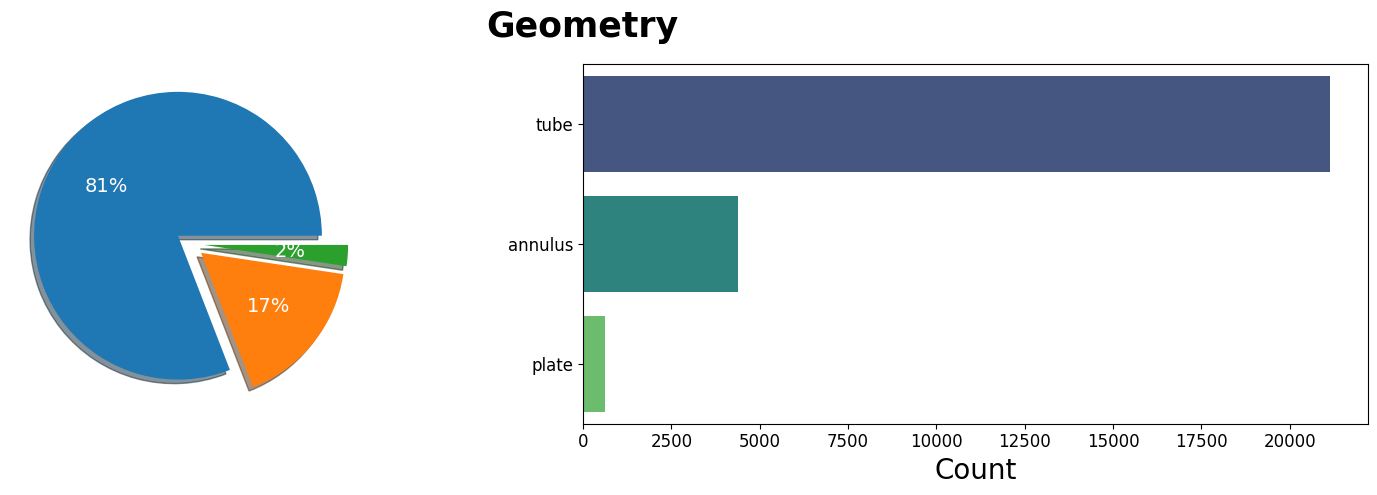

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax = ax.flatten()

ax[0].pie(
    data_raw['geometry'].value_counts(), 
    shadow = True, 
    explode = [.1 for i in range(0, 3)], 
    autopct = '%1.f%%',
    textprops = {'size' : 14, 'color' : 'white'}
)

sns.countplot(data = data_raw, y = 'geometry', ax = ax[1], palette = 'viridis')
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count', fontsize = 20)
ax[1].set_ylabel(None)
plt.xticks(fontsize = 12)

fig.suptitle('Geometry', fontsize = 25, fontweight = 'bold')
plt.tight_layout()

# Estudiamos la correlación entre las variables


In [ ]:
from src.functions import heatmap
heatmap(data_raw[numerical_features], "datos originales")

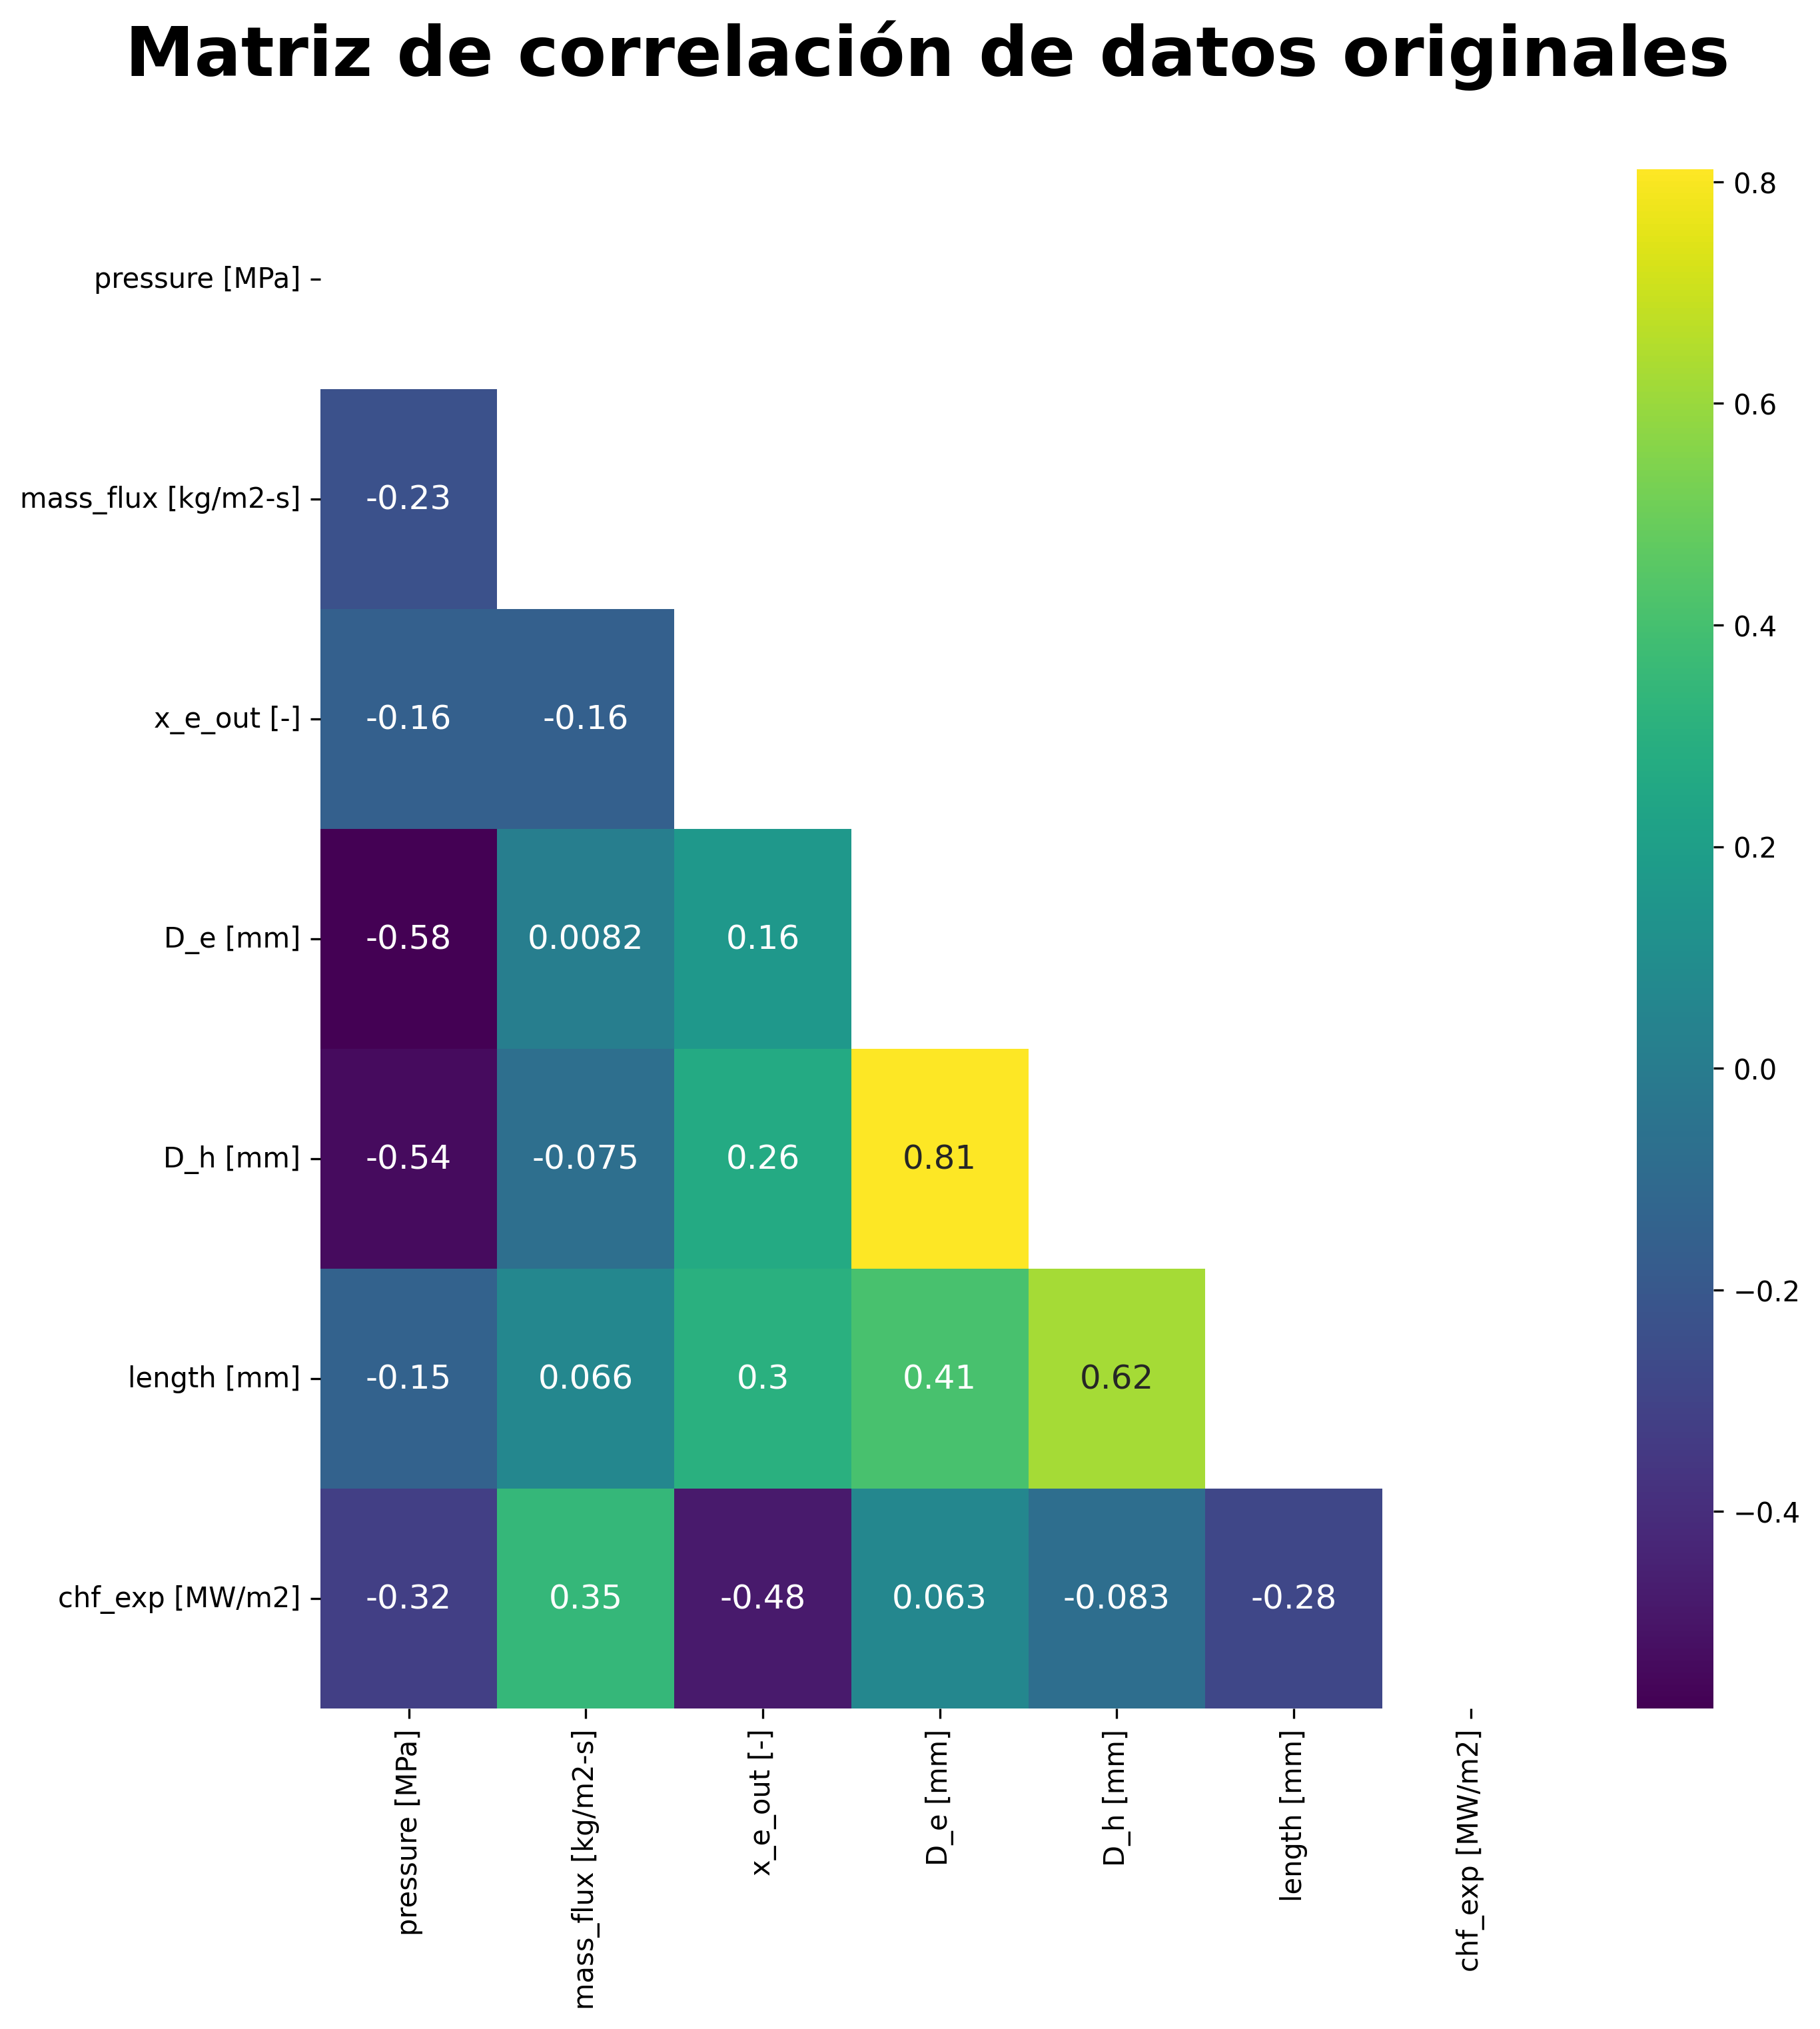

# Conclusiones de la correlación
### Las variables D_e y D_h están fuertemente correlacionadas.
### La mayoría de las otras variables numéricas tienen cierto grado de correlación entre sí.
### El *target* está más relacionado con chf_exp, luego con lenght y muy ligeramente con D_h y D_e.

In [ ]:
def distancia(data, label = ''):

    corr = data.corr(method = 'spearman')
    dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')
    
    plt.figure(figsize = (10, 8), dpi = 300)
    dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=90)
    plt.title(f'Distancia entre variables {label}', weight = 'bold', size = 22)
    plt.show()

In [ ]:
from src.functions import distancia

ImportError: cannot import name 'distancia' from 'src.functions' (c:\Users\prado\Desktop\Proyectos\Proyecto final ML\kaggle_ML_competition_heat_flux\notebooks\src\functions.py)

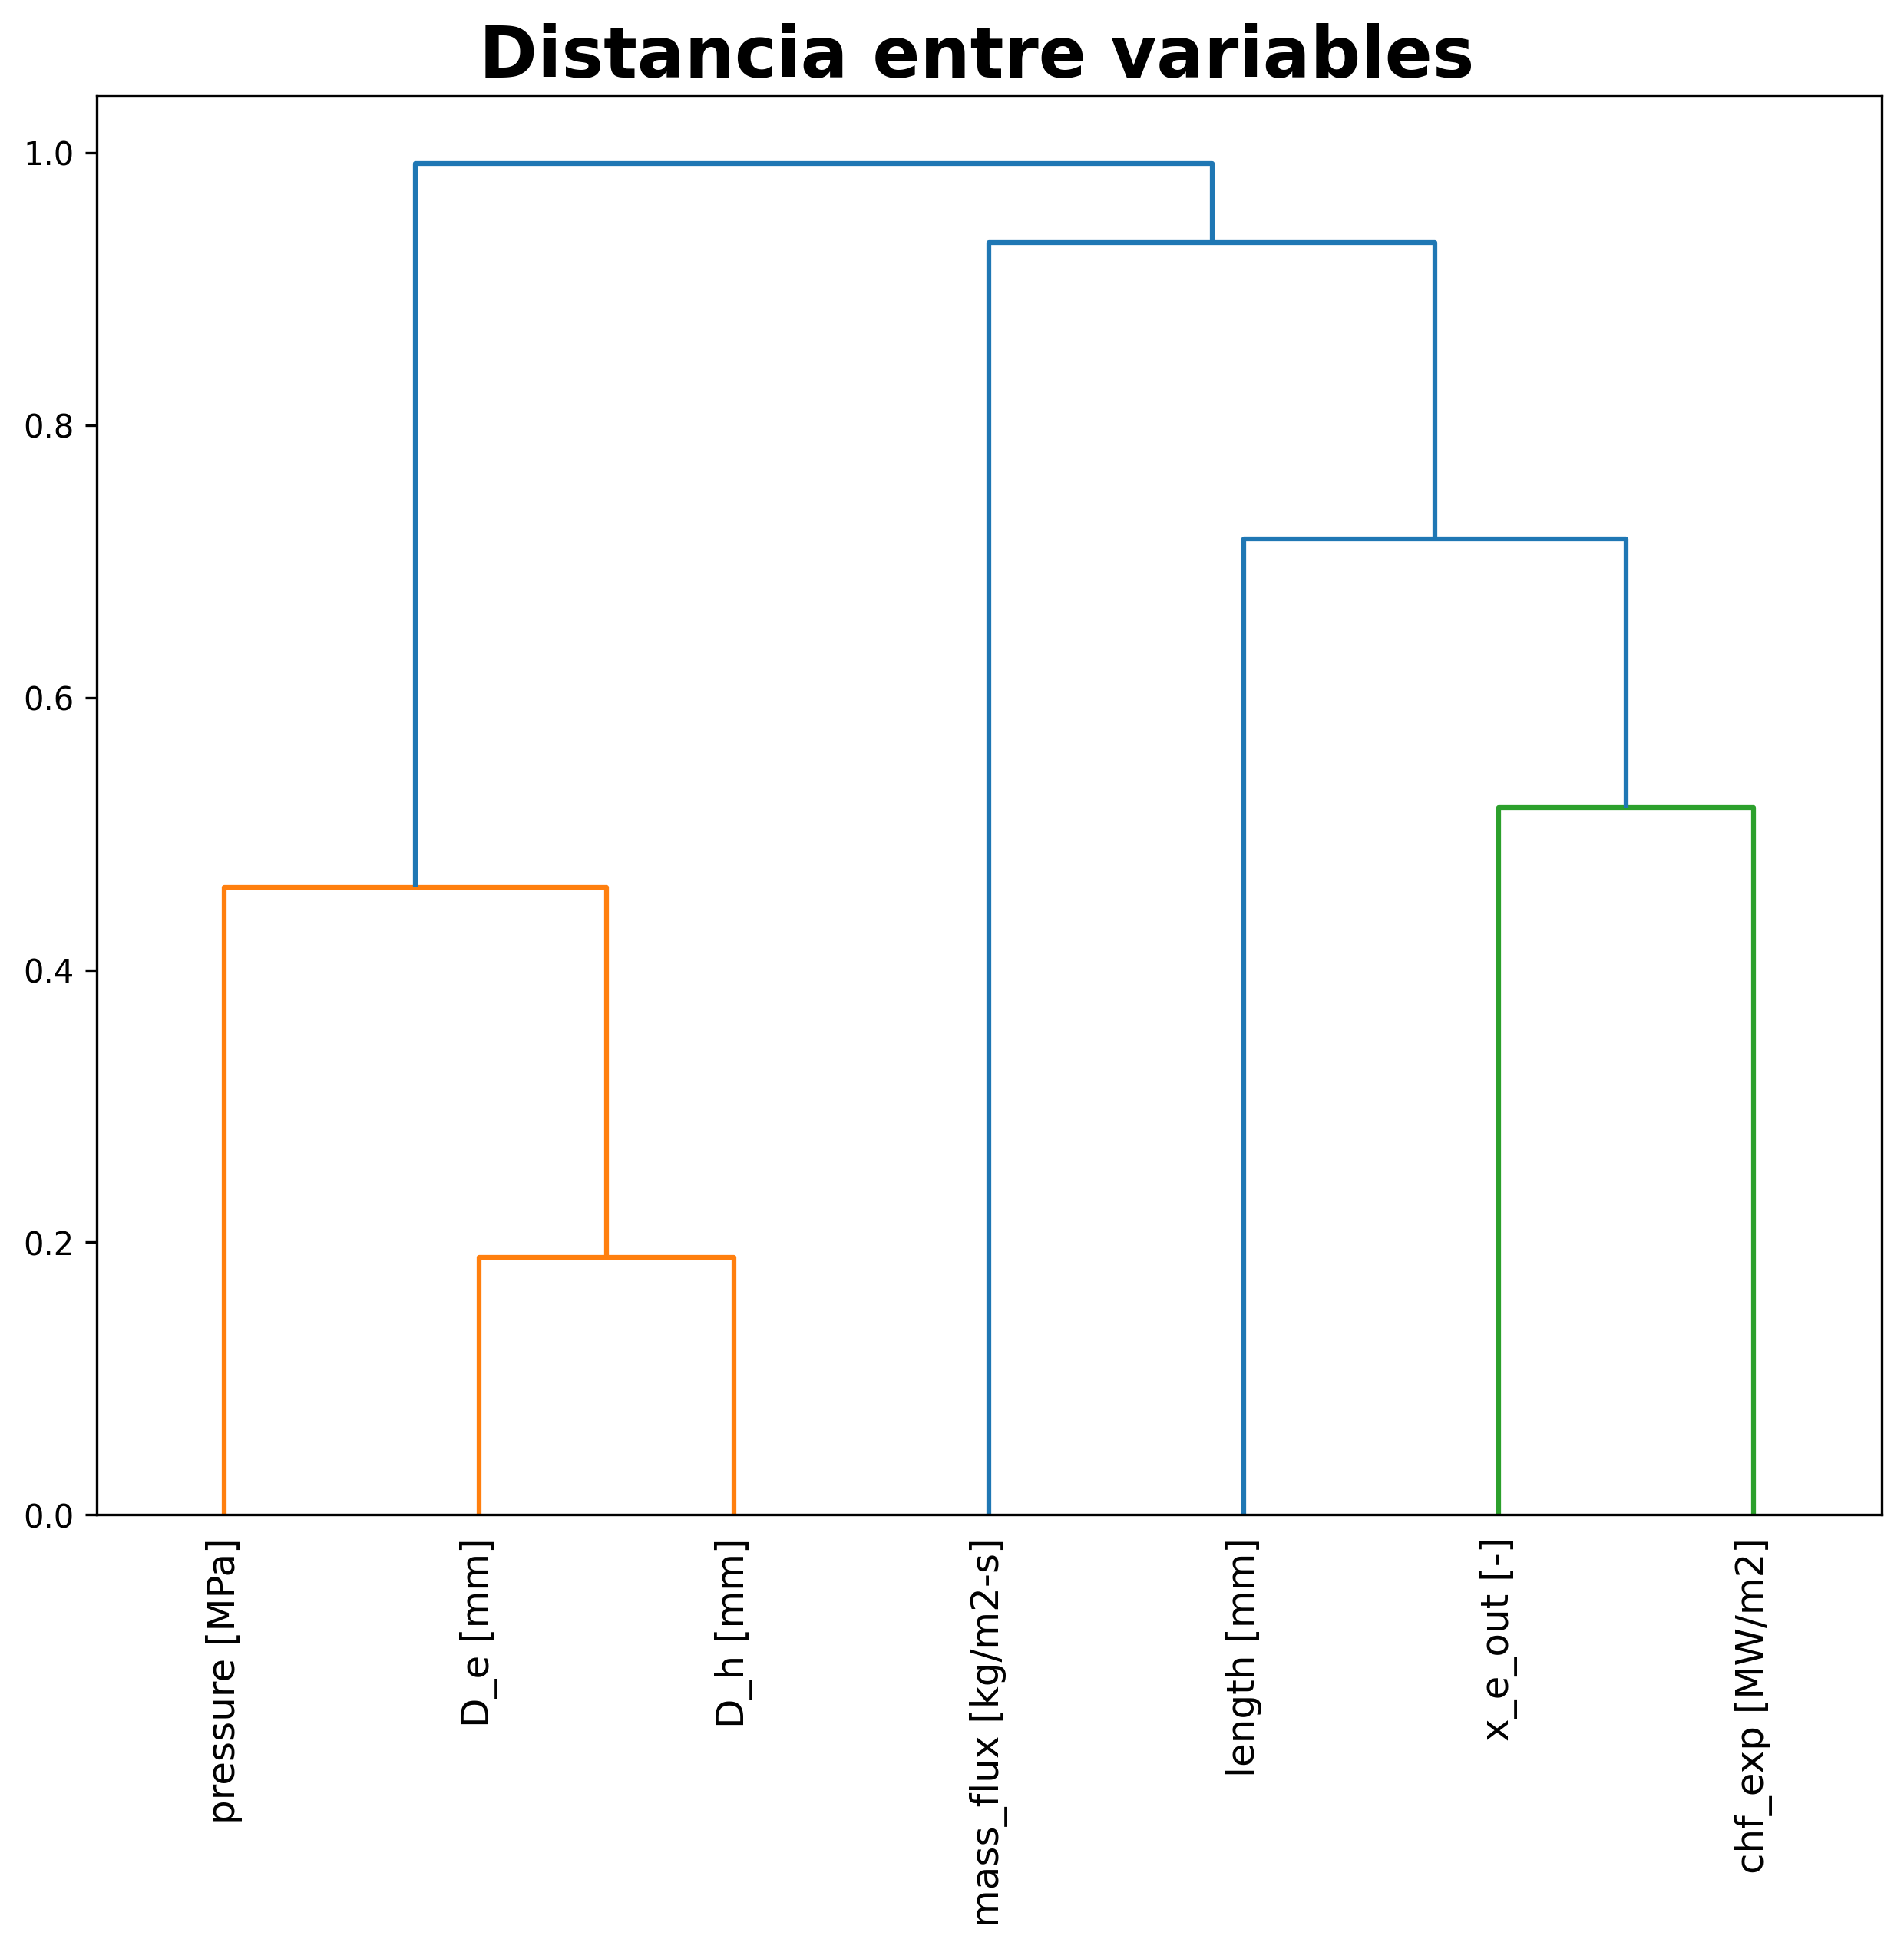

In [ ]:
distancia(data_raw[numerical_features])

# Rellenamos las variables categóricas en un nuevo DF
## El criterio que utilizamos será el valor que se repite con más frecuencia.

In [ ]:
# Rellenamos las variables categóricas con Thompson y tube porque son las que más se repiten, con diferencia
data_filled = data_raw.copy()

data_filled['author'] = data_filled['author'].fillna('Thompson')
data_filled['geometry'] = data_filled['geometry'].fillna('tube')
